<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Pivot_points_POLY_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Imports

In [ ]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install yfinance
#!conda install -c ranaroussi yfinance --y
import yfinance as yf # requires yfinance - pip install yfinance
clear_output()

In [ ]:
!pip install backtesting
clear_output()

# Библиоетки backtesting
from backtesting import Backtest, Strategy

In [ ]:
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_n_short_strategy.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_strategy.py
clear_output()
    
# Библиотеки из ai_tr_libs
from Long_n_short_strategy import Long_n_Short_Strategy as LnS
from Long_strategy import Long_Strategy as LS

# 1d: counter_lvl = 8

## Загружаем данные

In [ ]:
# Начните с активации обходного пути Yahoo Finance и установки начальной и конечной точек фрейма данных.
# здесь Yf.pdr_override () активирует ваши условия обходного пути, а остальное установит ваш фрейм данных.
yf.pdr_override()
start = dt.datetime(2020,1, 1)
now = dt.datetime.now()
interval = '1d'
stock = 'POLY.ME'

buy_signals = pd.DataFrame() # dataframe для записи сигналов
sell_signals = pd.DataFrame() # dataframe для записи сигналов

In [ ]:
df = pdr.get_data_yahoo(stock,
                        start,
                        now,
                        interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
del df['Adj Close'], df['Volume']
df.index.name = 'Date'
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-03,978.400024,989.299988,967.099976,989.299988
2020-01-06,995.599976,1004.700012,993.299988,1002.900024
2020-01-08,1008.799988,1016.099976,970.400024,974.099976
2020-01-09,972.799988,972.799988,943.000000,968.900024
2020-01-10,968.900024,989.000000,955.000000,981.000000
...,...,...,...,...
2021-05-17,1695.800049,1724.900024,1685.199951,1717.699951
2021-05-18,1727.000000,1762.500000,1724.900024,1753.000000
2021-05-19,1756.000000,1787.300049,1715.400024,1772.500000


## Разметка Y

In [ ]:
from markup_y import SELL, BUY

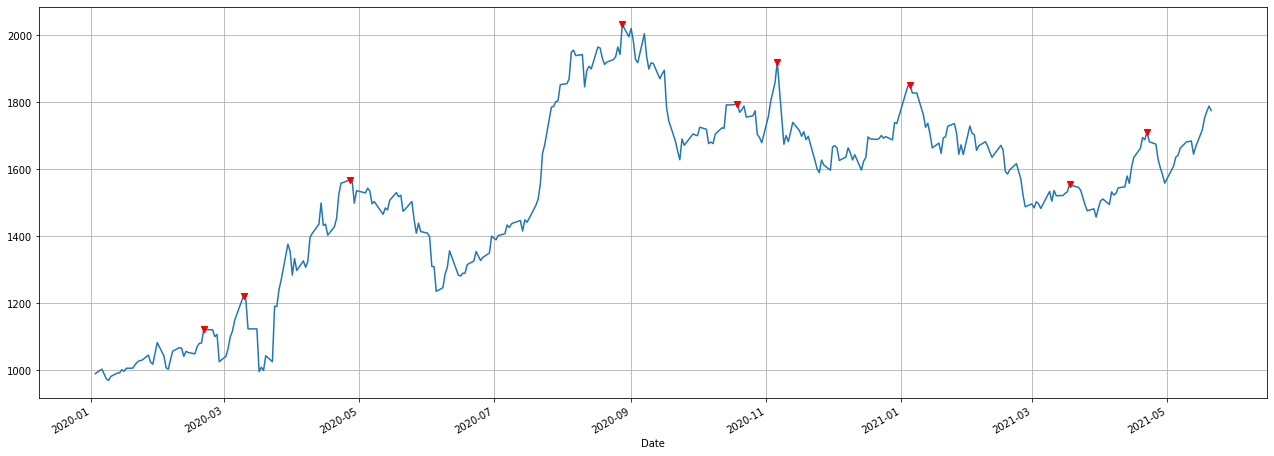

,price,Signal
Date,,
2020-02-21,1121.4,-1
2020-03-10,1222.0,-1
2020-04-27,1568.0,-1
2020-08-28,2031.8,-1
2020-10-19,1793.4,-1
2020-11-06,1920.4,-1
2021-01-05,1849.9,-1
2021-03-18,1554.6,-1
2021-04-22,1712.2,-1


In [ ]:
sell_signals = SELL(df, counter_lvl = 8)
sell_signals = sell_signals.set_index('Date')
sell_signals

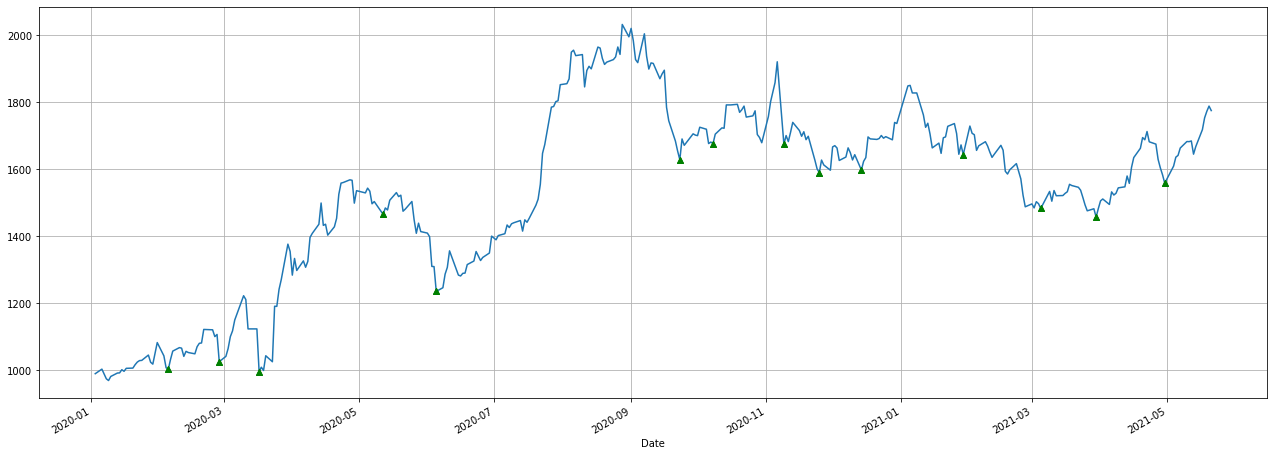

,price,Signal
Date,,
2020-02-05,1002.8,1
2020-02-28,1025.1,1
2020-03-17,995.5,1
2020-05-12,1465.0,1
2020-06-05,1235.0,1
2020-09-23,1628.0,1
2020-10-08,1676.1,1
2020-11-09,1674.2,1
2020-11-25,1589.6,1


In [ ]:
buy_signals = BUY(df, counter_lvl = 8)
buy_signals = buy_signals.set_index('Date')
buy_signals

## Обьединение датафреймов

In [ ]:
signals = sell_signals.append(buy_signals)
df_new = df

df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
df_new = df_new.fillna(0)
df_new.loc[df_new['Signal'] != 0]

,Open,High,Low,Close,Signal
Date,,,,,
2020-02-05,1016.000000,1019.900024,984.099976,1002.799988,1.0
2020-02-21,1091.699951,1124.500000,1090.300049,1121.400024,-1.0
2020-02-28,1105.699951,1105.699951,980.099976,1025.099976,1.0
2020-03-10,1150.000000,1265.400024,1150.000000,1222.000000,-1.0
2020-03-17,999.000000,1030.000000,907.299988,995.500000,1.0
2020-04-27,1578.199951,1597.800049,1544.800049,1568.000000,-1.0
2020-05-12,1499.000000,1500.000000,1428.500000,1465.000000,1.0
2020-06-05,1294.000000,1300.000000,1211.599976,1235.000000,1.0
2020-08-28,1960.000000,2036.000000,1942.699951,2031.800049,-1.0


## График торговли

### Long

In [ ]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [ ]:
stats

Start                     2020-01-03 00:00:00
End                       2021-05-21 00:00:00
Duration                    504 days 00:00:00
Exposure Time [%]                     72.2543
Equity Final [$]                       434739
Equity Peak [$]                        434739
Return [%]                            334.739
Buy & Hold Return [%]                 79.3895
Return (Ann.) [%]                     191.633
Volatility (Ann.) [%]                 94.9272
Sharpe Ratio                          2.01874
Sortino Ratio                          11.744
Calmar Ratio                          10.0016
Max. Drawdown [%]                    -19.1603
Avg. Drawdown [%]                     -3.9011
Max. Drawdown Duration       74 days 00:00:00
Avg. Drawdown Duration       14 days 00:00:00
# Trades                                    9
Win Rate [%]                          88.8889
Best Trade [%]                        56.8813
Worst Trade [%]                      -5.77458
Avg. Trade [%]                    

### Long & Short

In [ ]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [ ]:
stats

Start                     2020-01-03 00:00:00
End                       2021-05-21 00:00:00
Duration                    504 days 00:00:00
Exposure Time [%]                     69.3642
Equity Final [$]                       514267
Equity Peak [$]                        514267
Return [%]                            414.267
Buy & Hold Return [%]                 79.3895
Return (Ann.) [%]                     229.591
Volatility (Ann.) [%]                 111.248
Sharpe Ratio                          2.06377
Sortino Ratio                         14.6172
Calmar Ratio                          11.9826
Max. Drawdown [%]                    -19.1603
Avg. Drawdown [%]                    -3.30008
Max. Drawdown Duration       74 days 00:00:00
Avg. Drawdown Duration       12 days 00:00:00
# Trades                                   10
Win Rate [%]                               90
Best Trade [%]                        56.8813
Worst Trade [%]                      -5.77458
Avg. Trade [%]                    

# 1d: Подбор оптимального counter_lvl

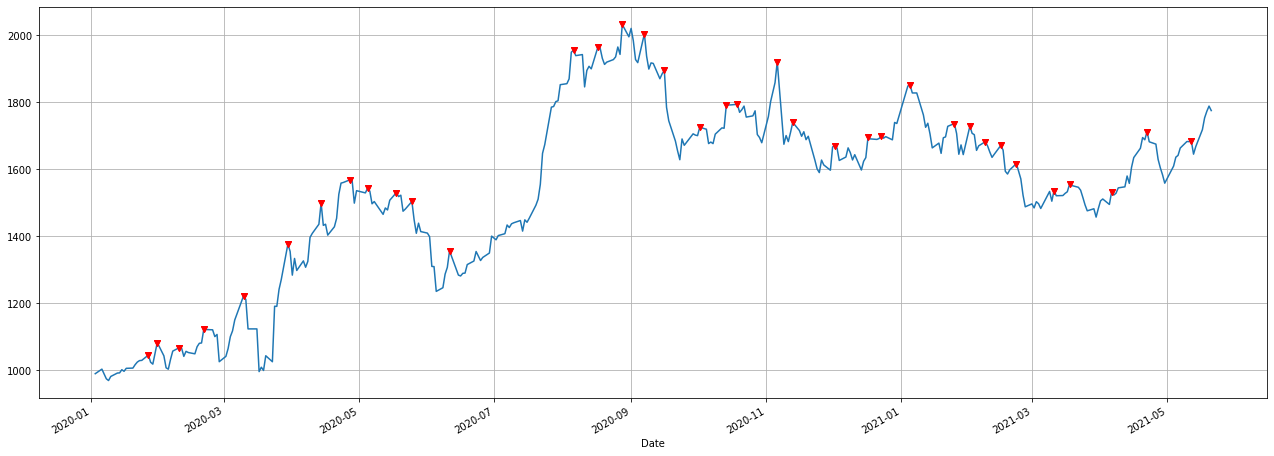

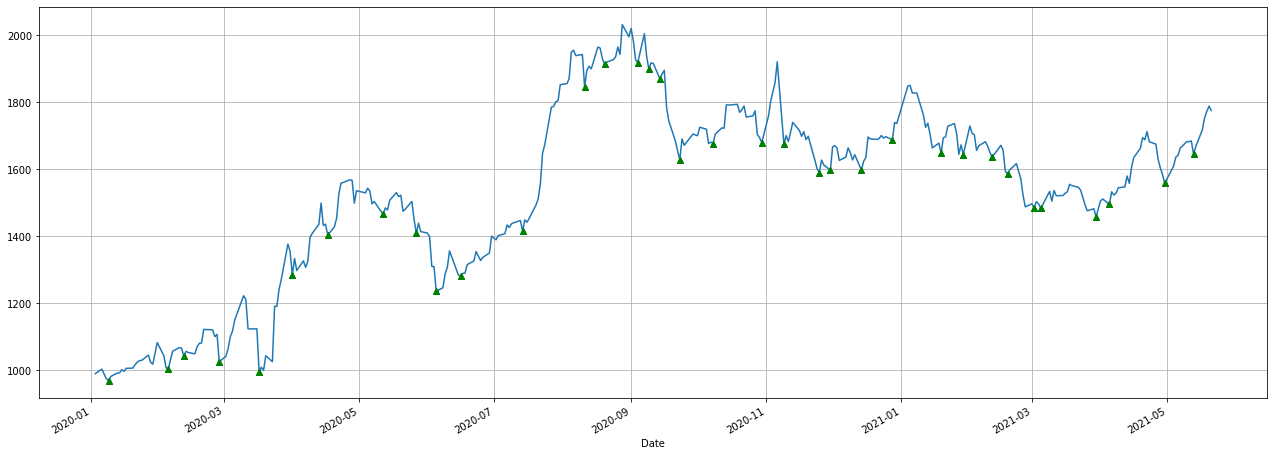

counter_lvl = 2 
 Return [%]                 910.98
Buy & Hold Return [%]     79.3895
Return (Ann.) [%]         439.235
Volatility (Ann.) [%]     136.605
Sharpe Ratio              3.21536
Sortino Ratio             83.2854
Calmar Ratio              159.407
Max. Drawdown [%]        -2.75543
Avg. Drawdown [%]       -0.850063
dtype: object




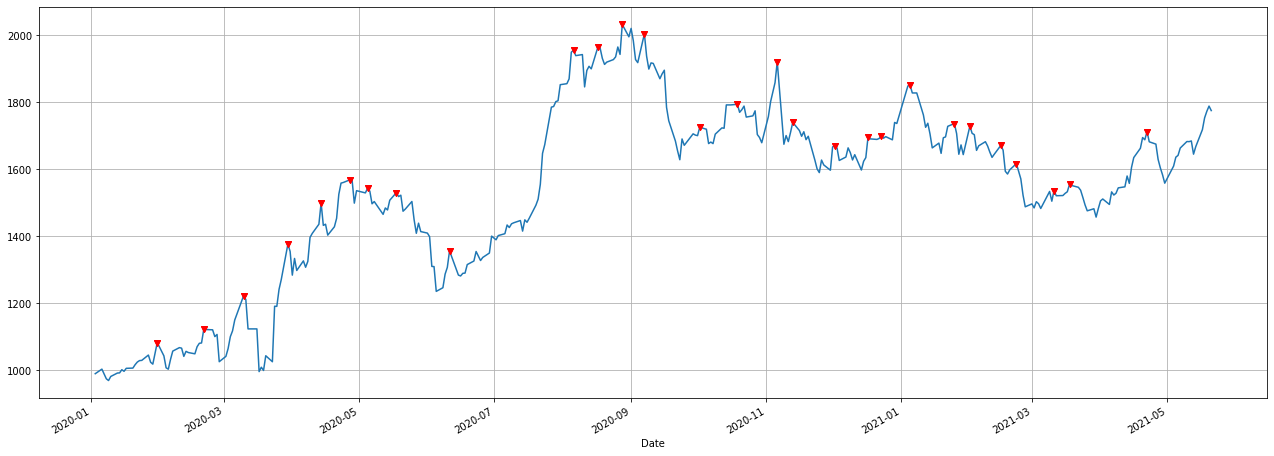

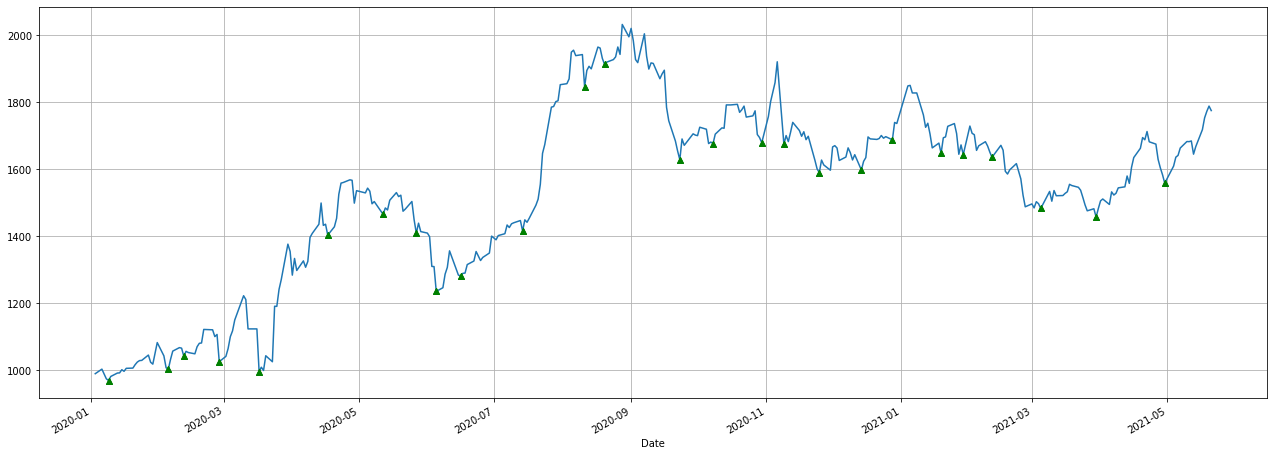

counter_lvl = 3 
 Return [%]               1041.76
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        489.191
Volatility (Ann.) [%]    166.883
Sharpe Ratio             2.93134
Sortino Ratio            79.6777
Calmar Ratio              177.49
Max. Drawdown [%]       -2.75615
Avg. Drawdown [%]       -1.00999
dtype: object




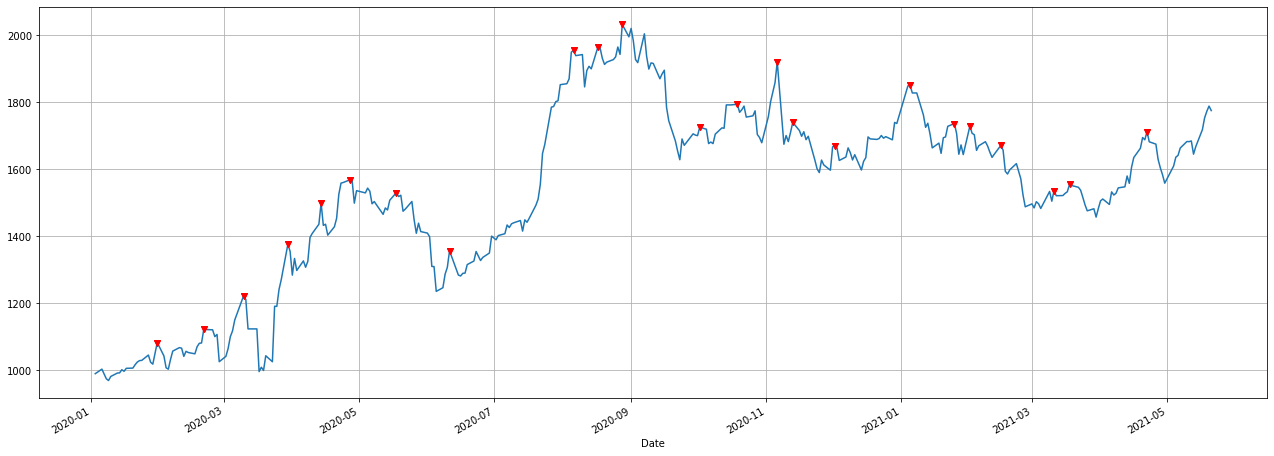

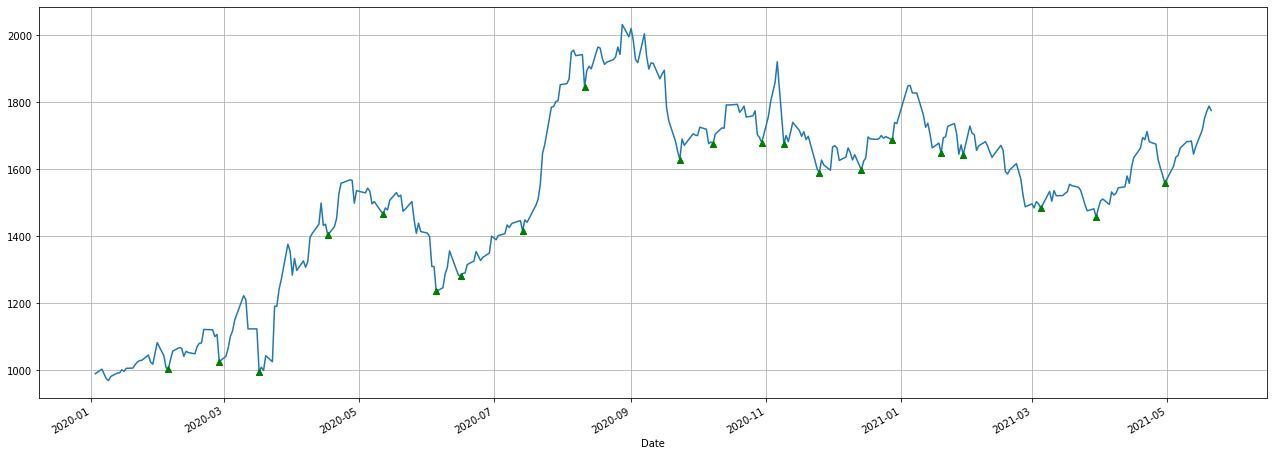

counter_lvl = 4 
 Return [%]               541.265
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        287.065
Volatility (Ann.) [%]    106.342
Sharpe Ratio             2.69945
Sortino Ratio            31.5122
Calmar Ratio             19.5682
Max. Drawdown [%]         -14.67
Avg. Drawdown [%]       -1.63611
dtype: object




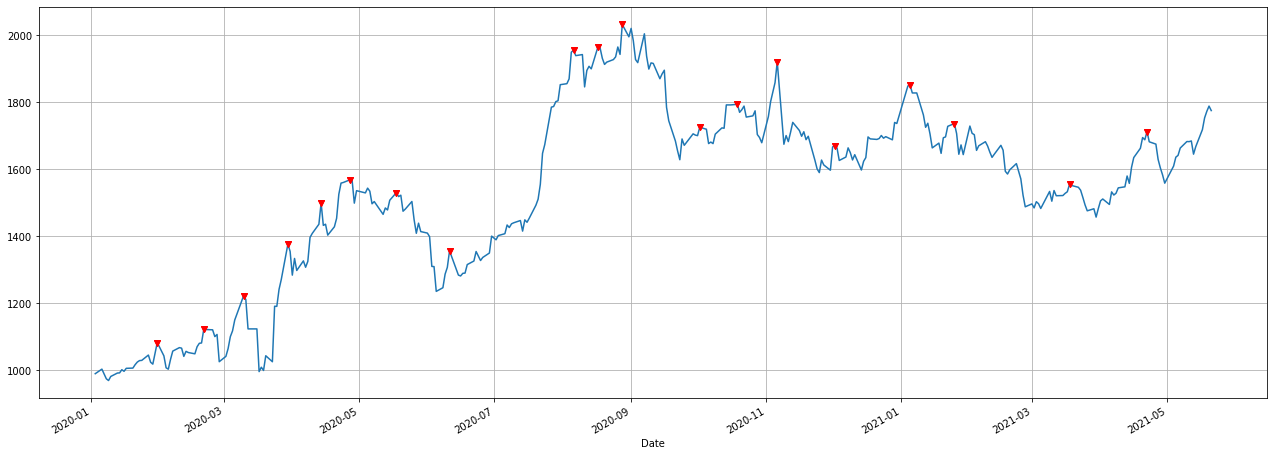

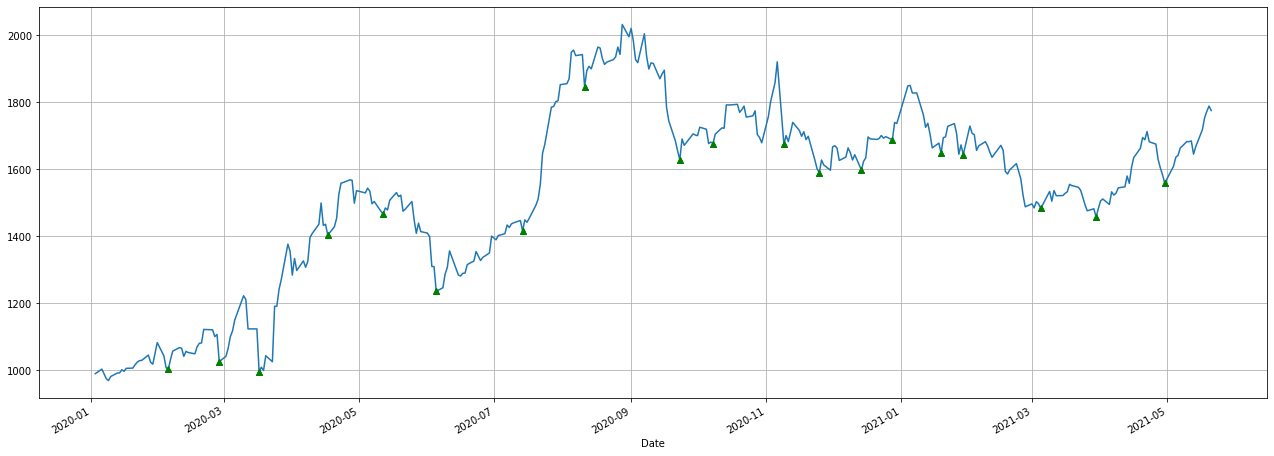

counter_lvl = 5 
 Return [%]               241.793
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        144.767
Volatility (Ann.) [%]     74.917
Sharpe Ratio             1.93236
Sortino Ratio            10.2706
Calmar Ratio             9.86822
Max. Drawdown [%]         -14.67
Avg. Drawdown [%]       -3.47202
dtype: object




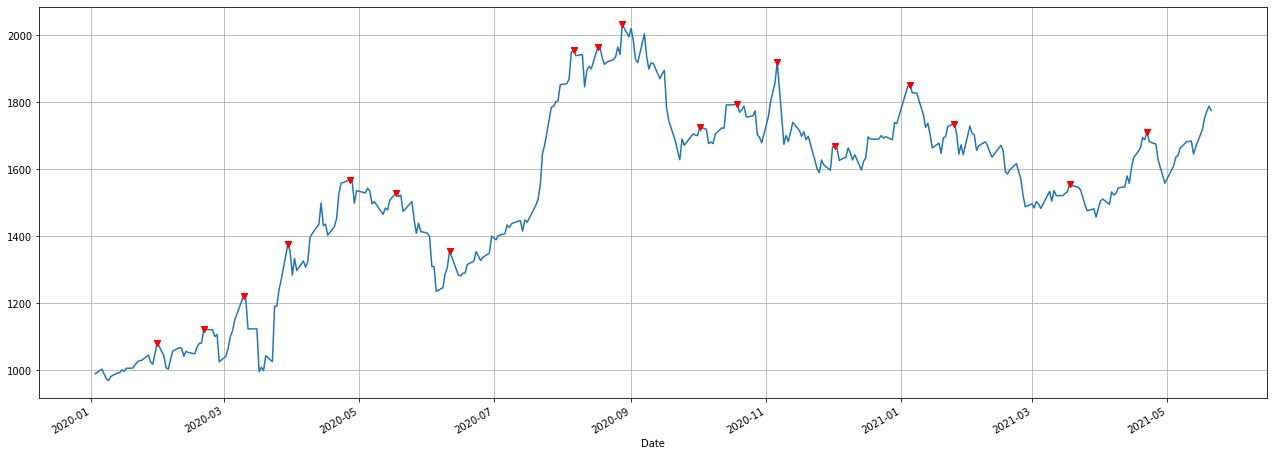

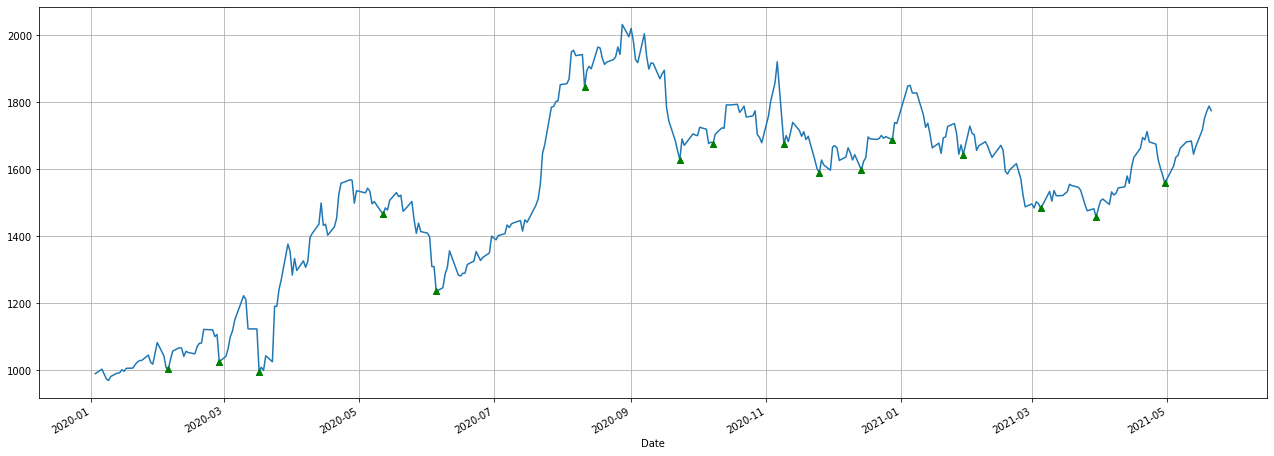

counter_lvl = 6 
 Return [%]               115.293
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        74.8049
Volatility (Ann.) [%]    64.5135
Sharpe Ratio             1.15952
Sortino Ratio            3.50626
Calmar Ratio             1.57648
Max. Drawdown [%]       -47.4506
Avg. Drawdown [%]       -7.35251
dtype: object




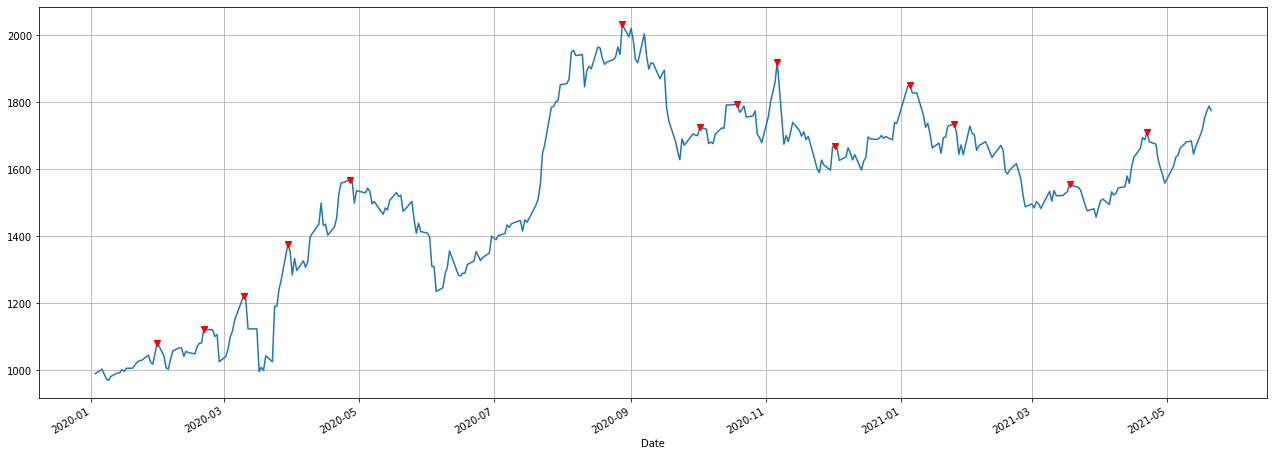

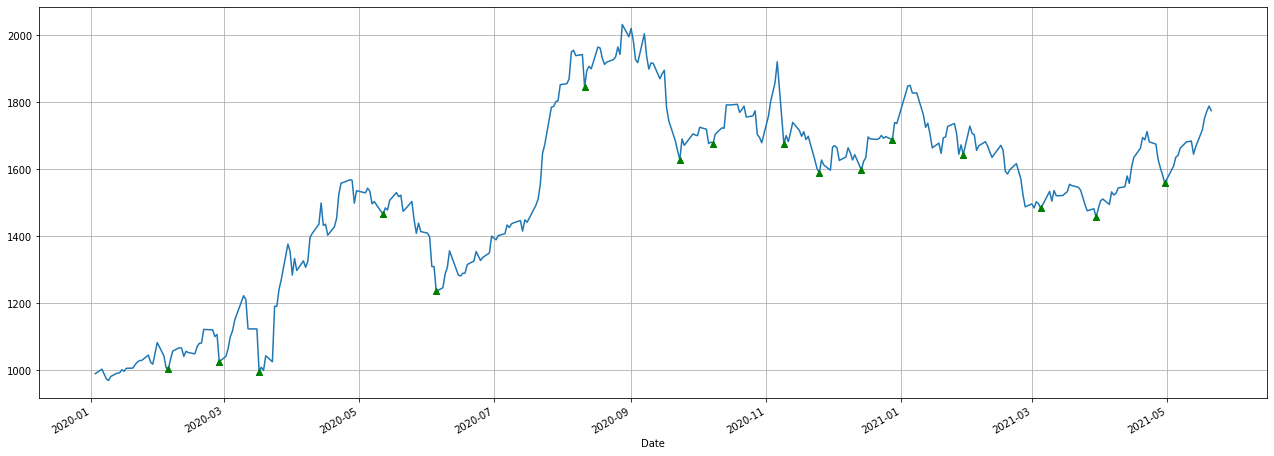

counter_lvl = 7 
 Return [%]               365.137
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        206.348
Volatility (Ann.) [%]    88.2276
Sharpe Ratio             2.33881
Sortino Ratio            16.4973
Calmar Ratio             10.6447
Max. Drawdown [%]       -19.3851
Avg. Drawdown [%]       -1.90924
dtype: object




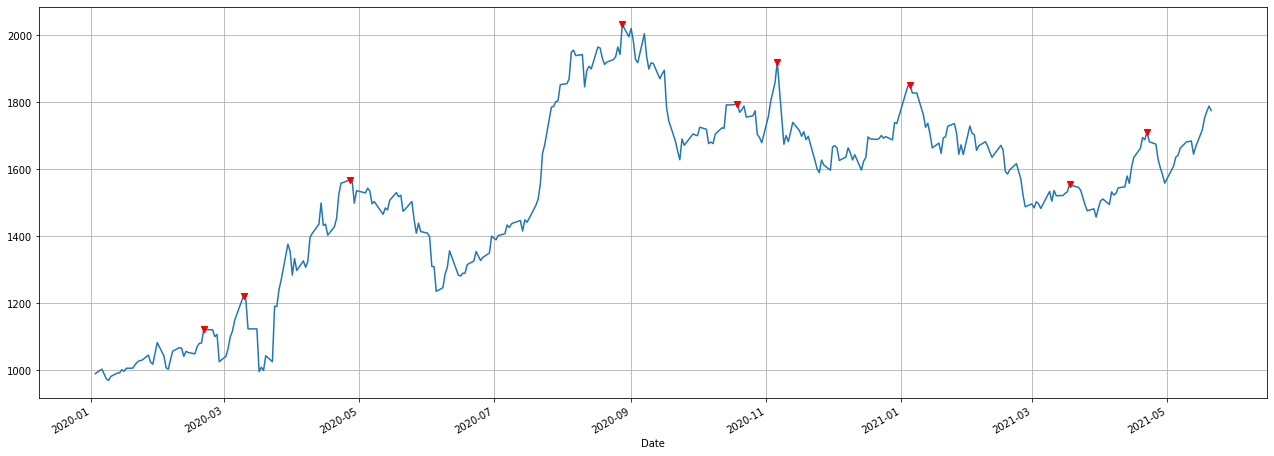

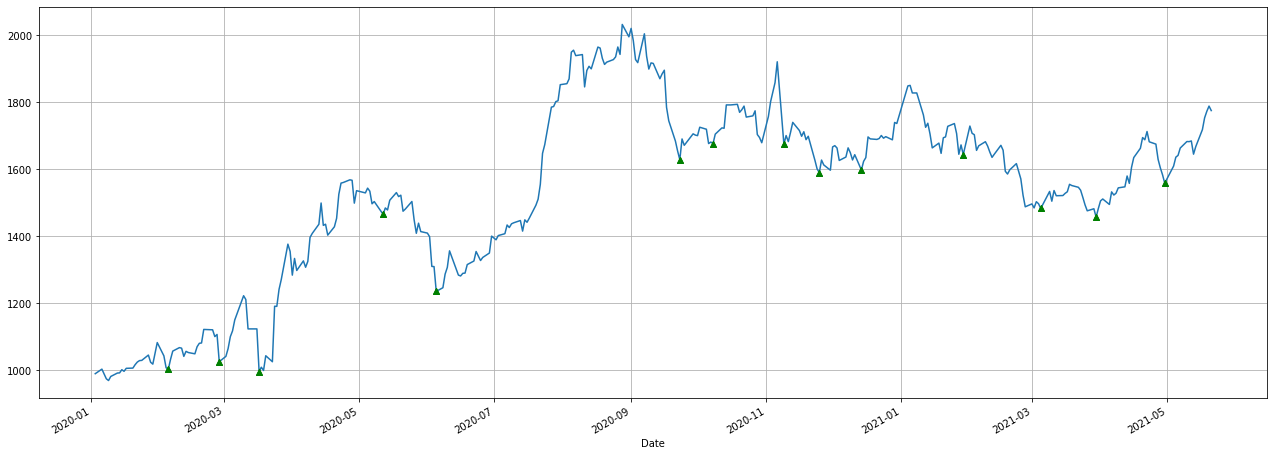

counter_lvl = 8 
 Return [%]               414.267
Buy & Hold Return [%]    79.3895
Return (Ann.) [%]        229.591
Volatility (Ann.) [%]    111.248
Sharpe Ratio             2.06377
Sortino Ratio            14.6172
Calmar Ratio             11.9826
Max. Drawdown [%]       -19.1603
Avg. Drawdown [%]       -3.30008
dtype: object



In [ ]:
LnS_results = pd.DataFrame() # dataframe для записи результатов подбора оптимального окна counter_lvl

for i in range(2, 9):
    
    # Разметим Y
    sell_signals = SELL(df, counter_lvl = i)
    sell_signals = sell_signals.set_index('Date')
    buy_signals = BUY(df, counter_lvl = i)
    buy_signals = buy_signals.set_index('Date')
    
    # Обьединим датафреймы
    signals = sell_signals.append(buy_signals)
    df_new = df

    df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
    df_new = df_new.fillna(0)
    df_new.loc[df_new['Signal'] != 0]
    
    # Backtesting
    # Стратегия Long & Short (подключен класс стратегии LnS)
    bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
    stats = bt.run()
    
    print('counter_lvl =', i, '\n', stats[6:15])
    print('='*100)
    print()
    
    line = pd.DataFrame({'counter_lvl':[i],
                         'Trades':[stats[17]],
                         'Return [%]':[stats[6]],
                         'Buy & Hold Return [%]':[stats[7]],
                         'Return (Ann.) [%]':[stats[8]],
                         'Sharpe Ratio':[stats[10]],
                         'Sortino Ratio':[stats[11]],
                         'Calmar Ratio':[stats[12]],
                         'Max. Drawdown [%]':[stats[13]],
                         'Avg. Drawdown [%]]':[stats[14]],
                         'Win Rate [%]':[stats[18]]
                        })
    LnS_results = LnS_results.append(line, ignore_index=True)
    

In [ ]:
LnS_results

,counter_lvl,Trades,Return [%],Buy & Hold Return [%],Return (Ann.) [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max. Drawdown [%],Avg. Drawdown [%]],Win Rate [%]
0,2,33,910.980073,79.389465,439.234716,3.215357,83.285438,159.406941,-2.755430,-0.850063,96.969697
1,3,24,1041.757497,79.389465,489.191014,2.931343,79.677714,177.490421,-2.756154,-1.009991,100.000000
2,4,21,541.264542,79.389465,287.065389,2.699451,31.512178,19.568213,-14.669985,-1.636115,95.238095
3,5,17,241.792823,79.389465,144.766624,1.932361,10.270585,9.868219,-14.669985,-3.472018,82.352941
4,6,15,115.293075,79.389465,74.804934,1.159524,3.506265,1.576479,-47.450631,-7.352512,86.666667
5,7,14,365.136887,79.389465,206.347898,2.338814,16.497341,10.644671,-19.385089,-1.909235,92.857143
6,8,10,414.266816,79.389465,229.591073,2.063770,14.617194,11.982635,-19.160316,-3.300077,90.000000
